# Differential gene expression analysis

In [1]:
library(ggplot2)
library(dplyr)
library(readr)
library(DESeq2)
#library(DiffBind)
library(tidyr)
#library(wesanderson)
library(viridis)
library(gplots)
library(pheatmap)
library(data.table)
library(EnhancedVolcano)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    Filter,

In [3]:
setwd('/lustre1/project/stg_00041/Irene/bulkRNAseq_primed_naive_PRC2i_2020/featureCount/')

In [4]:
gene_counts <- read.delim("gene_raw_counts_ordered.txt")

In [5]:
head(gene_counts)

GeneID,primed_rep1,primed_rep2,primed_rep3,primed_PRC2i_rep1,primed_PRC2i_rep2,primed_PRC2i_rep3,naive_rep1,naive_rep2,naive_rep3,naive_PRC2i_rep1,naive_PRC2i_rep2,naive_PRC2i_rep3
DDX11L1,1,0,0,0,0,0,0,0,0,0,0,0
WASH7P,0,0,1,2,1,0,0,1,1,0,1,0
MIR6859-1,0,0,0,0,0,0,0,0,0,0,0,0
MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,0,0
MIR1302-2,0,0,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
myvars_naive <- c("GeneID","naive_rep1","naive_rep2","naive_rep3", "naive_PRC2i_rep1","naive_PRC2i_rep2","naive_PRC2i_rep3")

In [7]:
gene_counts_naive <- gene_counts[myvars_naive]

In [8]:
head(gene_counts_naive)

GeneID,naive_rep1,naive_rep2,naive_rep3,naive_PRC2i_rep1,naive_PRC2i_rep2,naive_PRC2i_rep3
DDX11L1,0,0,0,0,0,0
WASH7P,0,1,1,0,1,0
MIR6859-1,0,0,0,0,0,0
MIR1302-2HG,0,0,0,0,0,0
MIR1302-2,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0


In [9]:
rownames(gene_counts_naive) <- gene_counts_naive[,1]

In [10]:
gene_counts_naive$GeneID <- NULL

In [11]:
head(gene_counts_naive)

,naive_rep1,naive_rep2,naive_rep3,naive_PRC2i_rep1,naive_PRC2i_rep2,naive_PRC2i_rep3
DDX11L1,0,0,0,0,0,0
WASH7P,0,1,1,0,1,0
MIR6859-1,0,0,0,0,0,0
MIR1302-2HG,0,0,0,0,0,0
MIR1302-2,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0


In [12]:
condition <- factor(c("naive","naive","naive","naive_PRC2i","naive_PRC2i","naive_PRC2i"), levels = c("naive_PRC2i", "naive"))
print(condition)

[1] naive       naive       naive       naive_PRC2i naive_PRC2i naive_PRC2i
Levels: naive_PRC2i naive


In [13]:
colData <- data.frame(sampleName = colnames(gene_counts_naive),
                      condition = condition)

In [14]:
colData

sampleName,condition
naive_rep1,naive
naive_rep2,naive
naive_rep3,naive
naive_PRC2i_rep1,naive_PRC2i
naive_PRC2i_rep2,naive_PRC2i
naive_PRC2i_rep3,naive_PRC2i


In [15]:
dds_unbiased <- DESeqDataSetFromMatrix(countData = gene_counts_naive, 
                                       colData = colData, 
                                       design = ~ condition)

colnames(dds_unbiased) <- colnames(gene_counts_naive)

In [16]:
dds_unbiased

class: DESeqDataSet 
dim: 59050 6 
metadata(1): version
assays(1): counts
rownames(59050): DDX11L1 WASH7P ... MT-TT MT-TP
rowData names(0):
colnames(6): naive_rep1 naive_rep2 ... naive_PRC2i_rep2
  naive_PRC2i_rep3
colData names(2): sampleName condition

only keep rows that at least 2 conditions have >1 counts

In [17]:
dds_unbiased <- dds_unbiased[ rowSums(counts(dds_unbiased)>1) >=2, ]

In [18]:
dds_unbiased

class: DESeqDataSet 
dim: 24880 6 
metadata(1): version
assays(1): counts
rownames(24880): AL627309.6 AL627309.7 ... MT-TT MT-TP
rowData names(0):
colnames(6): naive_rep1 naive_rep2 ... naive_PRC2i_rep2
  naive_PRC2i_rep3
colData names(2): sampleName condition

In [19]:
dds_unbiased$condition

[1] naive       naive       naive       naive_PRC2i naive_PRC2i naive_PRC2i
Levels: naive_PRC2i naive

In [20]:
dds <- DESeq(dds_unbiased, betaPrior=FALSE)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [21]:
res_deseq <- results(dds)

In [22]:
res_deseq <- res_deseq[order(res_deseq$log2FoldChange),]

In [23]:
#write.table(res_deseq, "res_deseq_N_NI.txt", sep="\t")

In [24]:
res_deseq$padj <- p.adjust(res_deseq$pvalue, method="BH")

In [25]:
head(res_deseq)

log2 fold change (MLE): condition naive vs naive PRC2i 
Wald test p-value: condition naive vs naive PRC2i 
DataFrame with 6 rows and 6 columns
                   baseMean    log2FoldChange            lfcSE
                  <numeric>         <numeric>        <numeric>
CXCL1      2.43161880038185 -4.73533837795902 1.70058300293104
AC079148.1 2.20784143949971 -4.61351034377767 1.73665238688171
AC097658.3 1.98928601004309 -4.46749372421456 3.84036047967346
RPL23AP77  1.89600479206679 -4.39466466451482 1.79342408976733
AC106900.1 1.84010110278833 -4.35533991718995 3.75679798057384
LINC01859  1.85733441500345 -4.35092839423278 1.83400969313062
                        stat              pvalue              padj
                   <numeric>           <numeric>         <numeric>
CXCL1      -2.78453822588927 0.00536040022527331 0.121902556859758
AC079148.1 -2.65655371139735 0.00789438741768234 0.157754590011662
AC097658.3  -1.1633006192675   0.244707554523022 0.832614776939041
RPL23AP77  -2.4504

In [26]:
#write.table(res_deseq, "res_deseq_N_NI_adj.txt", sep="\t")

In [27]:
#res_deseq.sign <- res_deseq[(!is.na(res_deseq$padj)) & (res_deseq$adj < 0.05) & (res_deseq$log2FoldChange < 1),]
#dim(res_deseq.sign)

In [28]:
#res_deseq.sign

In [29]:
  # create custom key-value pairs for 'high', 'low', 'mid' expression by fold-change
  # this can be achieved with nested ifelse statements
  keyvals <- ifelse(
    res_deseq$log2FoldChange < -1 & res_deseq$pvalue<0.01, 'royalblue3',
      ifelse(res_deseq$log2FoldChange > 1 & res_deseq$pvalue<0.01, 'red3',
        'grey87'))
  keyvals[is.na(keyvals)] <- 'grey87'
  names(keyvals)[keyvals == 'red3'] <- 'increased gene expression'
  names(keyvals)[keyvals == 'grey87'] <- 'no change'
  names(keyvals)[keyvals == 'royalblue3'] <- 'decreased gene expression'

In [56]:
options(repr.plot.width=5, repr.plot.height=5)
volcano_naive_prc2i<- EnhancedVolcano(res_deseq,
                                       lab = rownames(res_deseq),
                                       legendPosition = 'none',
                                       x = 'log2FoldChange',
                                       y = 'pvalue',
                                       subtitle = NULL,
                                       title = NULL,
                                       ylim = c(0, 26),
                                       #xlim = c(-5, 5),
                                       axisLabSize = 14,
                                       FCcutoff = 1, 
                                       pCutoff = 0.01,
                                       pointSize = c(ifelse(abs(res_deseq$log2FoldChange)>1 & res_deseq$pvalue<0.01, 1.5, 1)),
                                       #shape = 8,
                                       labSize = 4,
                                       colCustom = keyvals,
                                       colAlpha = 1,
                                       gridlines.major = F, 
                                       gridlines.minor = F,
                                       border = 'full', 
                                       borderWidth = 0.5, 
                                       borderColour = 'black')


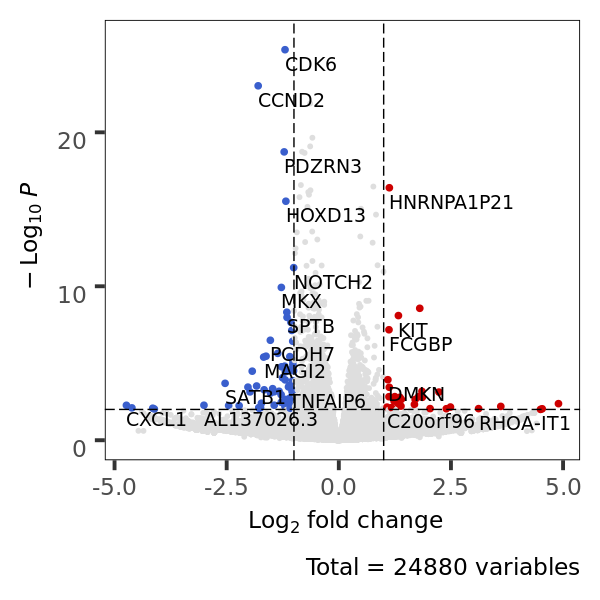

In [57]:
volcano_naive_prc2i

In [46]:
setwd('/lustre1/project/stg_00041/Irene/Human_sequencing/Figures/')

In [47]:
pdf("volcano_N_NI_V2.pdf",width=5,height=5,useDingbats = FALSE)
plot(volcano_naive_prc2i)
dev.off()

png 
  2